# Student Performance Model Prediction.


The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.
Variables:
1. Hours Studied: The total number of hours spent studying by each student.
2. Previous Scores: The scores obtained by students in previous tests.
3. Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
4. Sleep Hours: The average number of hours of sleep the student had per day.
5. Sample Question Papers Practiced: The number of sample question papers the student practiced.
6. Target Variable:
1. Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance

# Aim
The main Aim of Finding the relationship and predicting the performance of the student by their studied hours and other features and also finding the relationship between these features with the performance of the student

In [1]:
#Importing the important Libraries of Python that is used for the model preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the CSV file of the data that contains our dataset
df=pd.read_csv("Student_Performance.csv")

# Preprocessing the Data
Data Cleaning is one of the most integral part of analysis, in order to get something meaningful out of a huge dataset we need to figure out how to extract a generalized, smaller and more skewed sub-dataFrame out of it.

In [3]:
#Checking the Dataset columns
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
#Checking for the columns of the Dataset
feature_list=[]
feature_list.append(df.columns)
print(feature_list)

[Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')]


In [5]:
# Checking for the Datatype of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
#Statiscal Analysis of the data
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
#checking the shape of the data
df.shape

(10000, 6)

# Exploratary Data Analysis
Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. it’s a scientific approach to get the story of the data.

It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed.

In [8]:
#Checking for the null values in the dataset
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
#Checking for the duplicate values in the dataset
df.duplicated().sum()

127

In [10]:
#Removing the duplicates from the dataset
df.drop_duplicates(inplace=True)

In [11]:
# Handling the categorial Data
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


So, There is a categorial data in the form of Yes and No present in the Data in the column named "Extracurricular Activities" 

In [12]:
#Mapping the Categorial feature in the form of 0(No) and 1(Yes)
df['Extracurricular Activities']= df['Extracurricular Activities'].map({'Yes':1,'No':0})

In [13]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


# Data Visualization

<Axes: xlabel='Hours Studied', ylabel='count'>

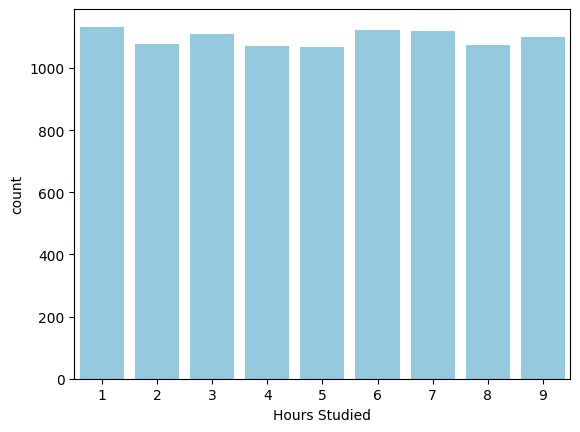

In [14]:
#Plotting the countplot for the hours studied by the student
sns.countplot(data=df,x="Hours Studied", color='skyblue')

**No specific Observation can be done from above**

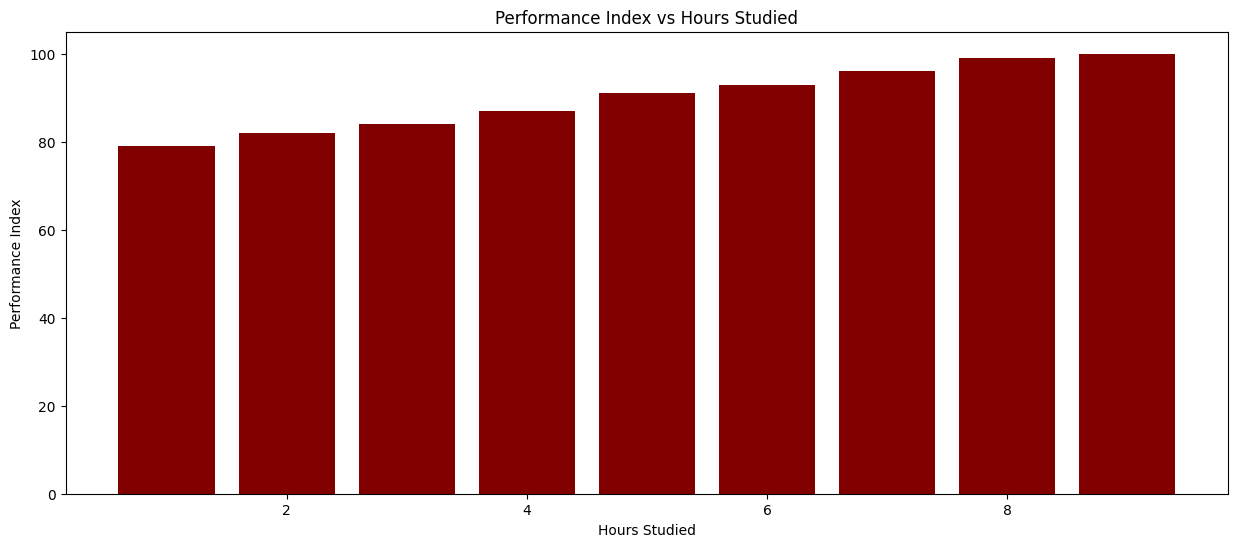

In [15]:
#Bar graph for the studies hours and the performance index
plt.figure(figsize=(15, 6))
plt.bar(df['Hours Studied'], df['Performance Index'], color='maroon')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Performance Index vs Hours Studied')
plt.show()

**It can be clearly seen that the performance of the student is increasing with the increase in the study hours**

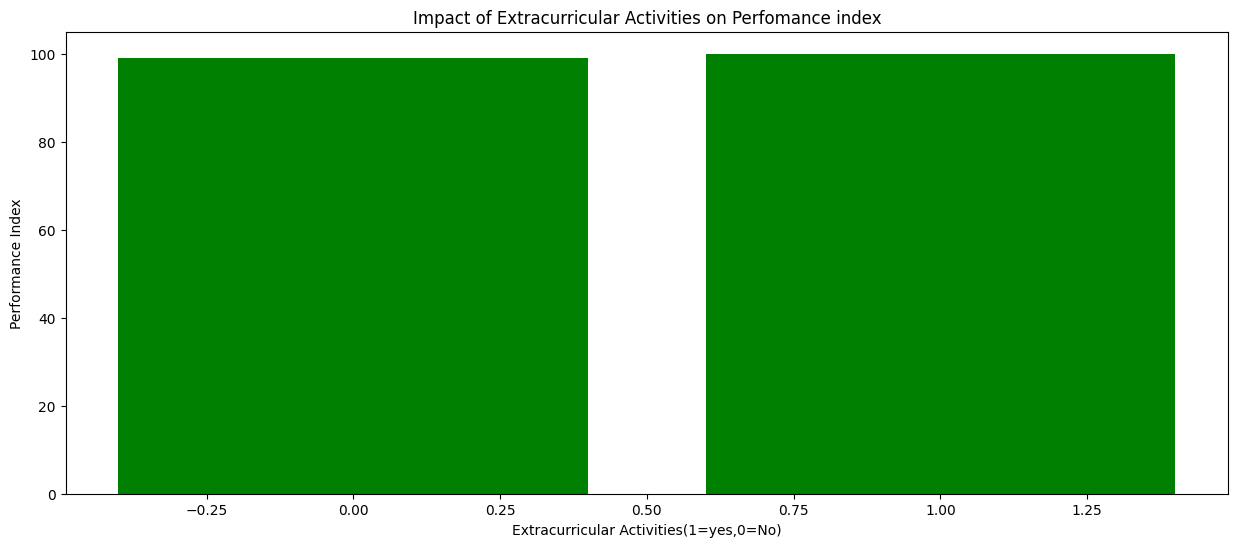

In [16]:
#Checking for the Extracurricular activities with the bar graph
plt.figure(figsize=(15,6))
plt.bar(df['Extracurricular Activities'],df['Performance Index'],color='green')
plt.xlabel('Extracurricular Activities(1=yes,0=No)')
plt.ylabel("Performance Index")
plt.title("Impact of Extracurricular Activities on Perfomance index")
plt.show()

**As it can be clearly seen that there is no impact on the performance by participating in the Extracurricular Activities. The performance remain unaffected**

<function matplotlib.pyplot.show(close=None, block=None)>

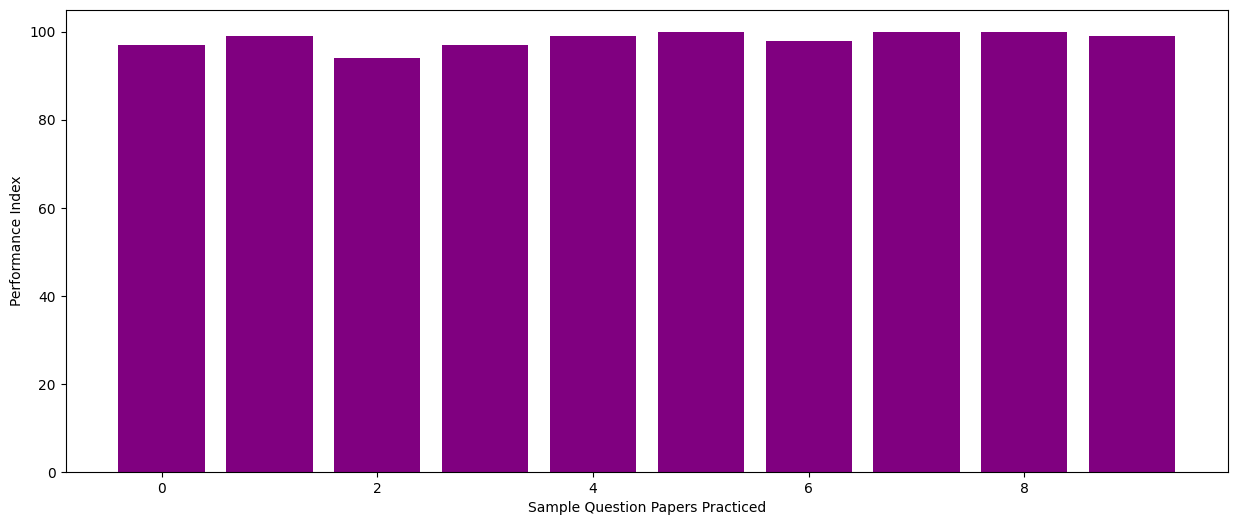

In [17]:
#Checking the impact of the Sample Question Papers Practiced on the Performance Index of the students
plt.figure(figsize=(15,6))
plt.bar(df["Sample Question Papers Practiced"],df["Performance Index"],color='purple')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.show

***Hence there is no particular relation with the Sample Question Papers Practiced by the students in their Performance Index***

# Checking the Multicollinearity of the dataset
Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.

In [18]:
coll=df.corr()
coll

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


<Axes: >

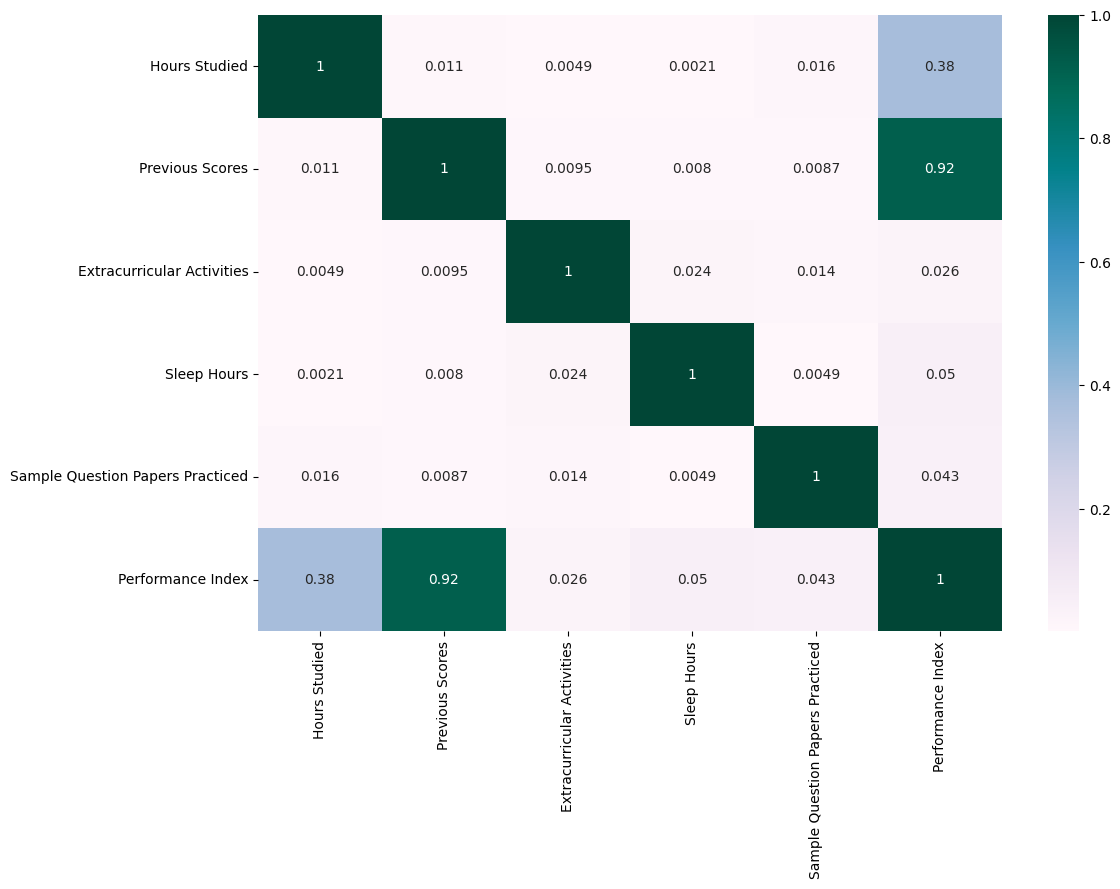

In [19]:
# using correlation graph to check multicollinearity

plt.figure(figsize=(12,8))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)

# VIF Calculation:-
VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. In some cases VIF of less than 10 is also acceptable.

Here, we have performed the VIF calculations for the clarity about the correlation between the features. after that, we have dropped the features which were highly correlated with any other independent features for accurate predictions.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Making function for VIF calculation.

def cal_VIF(F):
 
  
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)

In [21]:
#Checking the VIF score of all the independent variables.
cal_VIF(df[[i for i in df.describe().columns if i not in ['Performance Index']]])

,variables,VIF
0,Hours Studied,4.265115
1,Previous Scores,10.119579
2,Extracurricular Activities,1.929446
3,Sleep Hours,9.843302
4,Sample Question Papers Practiced,3.350801


***As all the varibles have good VIF score and Previous Scores are highly correlated to the performance index***

# Detecting the outliers in the Dataset

In [22]:
#Finding the Outliers in the dataset

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Select numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns
# Loop through numerical columns and detect outliers
for col in numerical_cols:
    outliers = detect_outliers_iqr(df[col])
    print("Outliers in column", col, ":", df[col][outliers])

Outliers in column Hours Studied : Series([], Name: Hours Studied, dtype: int64)
Outliers in column Previous Scores : Series([], Name: Previous Scores, dtype: int64)
Outliers in column Extracurricular Activities : Series([], Name: Extracurricular Activities, dtype: int64)
Outliers in column Sleep Hours : Series([], Name: Sleep Hours, dtype: int64)
Outliers in column Sample Question Papers Practiced : Series([], Name: Sample Question Papers Practiced, dtype: int64)
Outliers in column Performance Index : Series([], Name: Performance Index, dtype: float64)


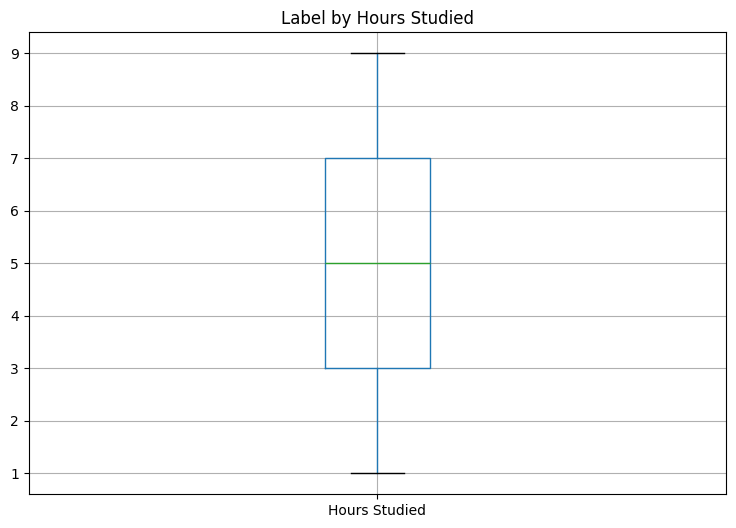

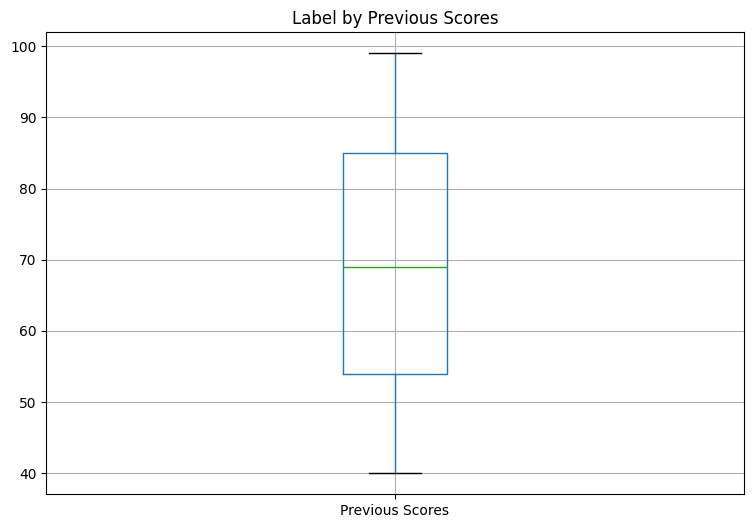

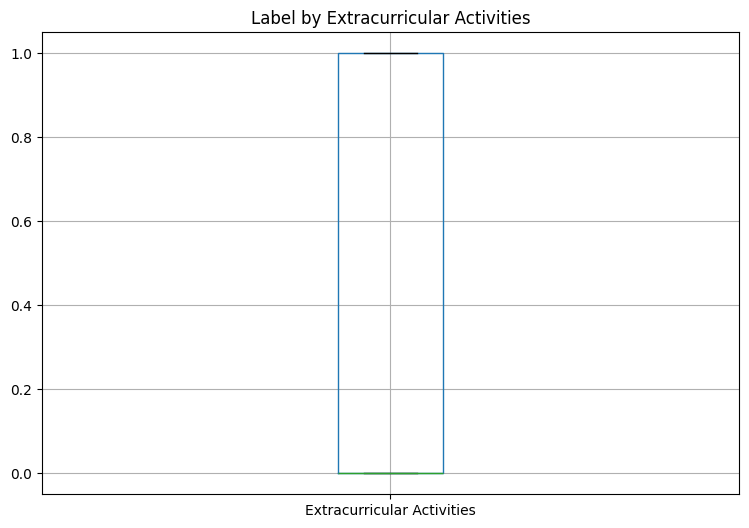

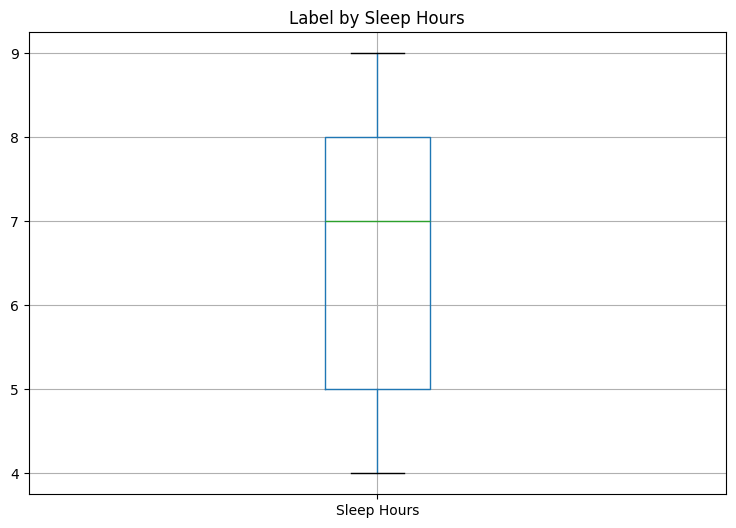

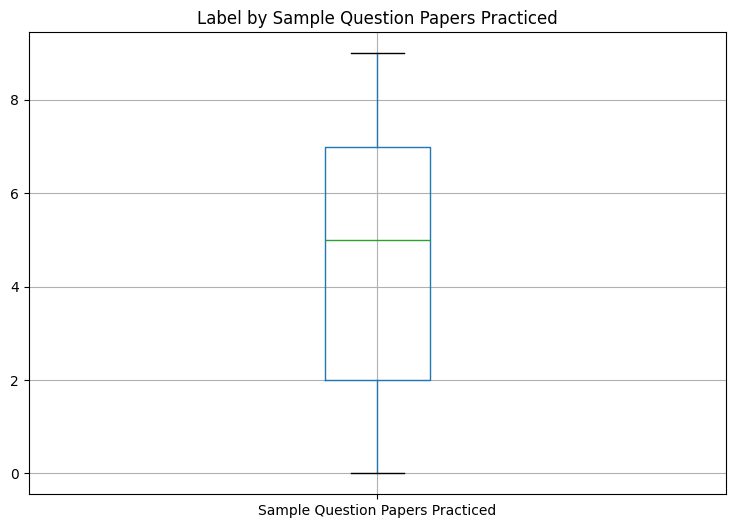

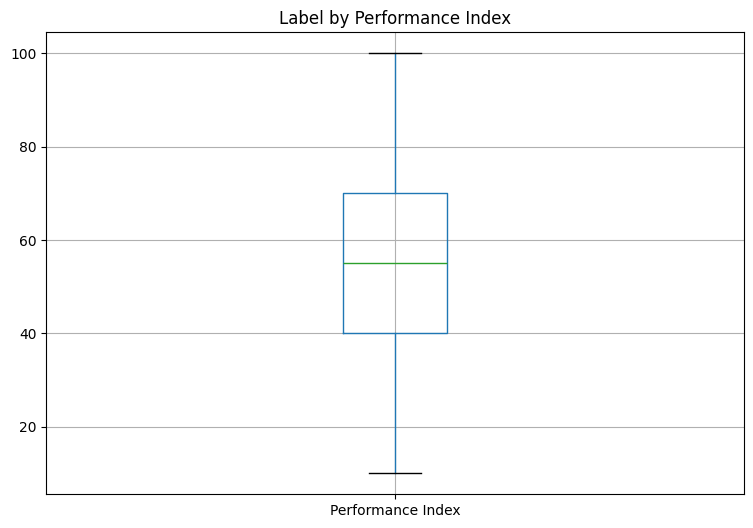

In [23]:
for col in df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(col)
    ax.set_title('Label by ' + col)
    
plt.show()

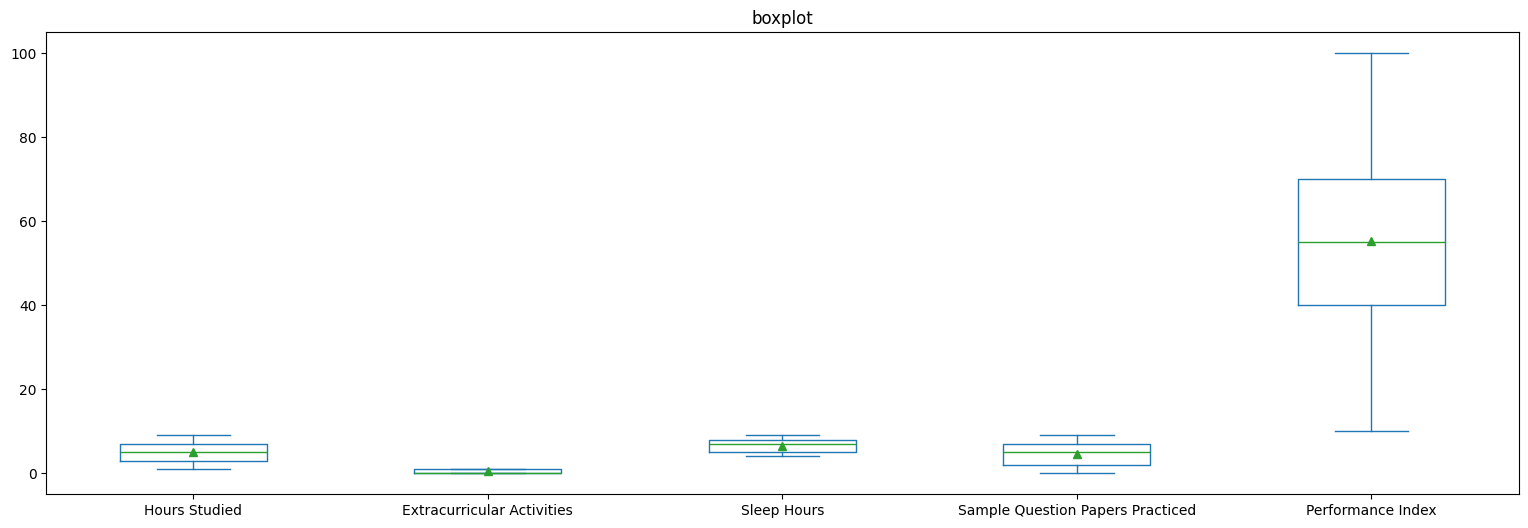

In [24]:
#Plotting the Combined Boxplot.
plt.rcParams['figure.figsize']=(19,6)
ax = df[['Hours Studied', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

***Hence Here we can conclude that there is no outlier present in any variable***

C:\Users\ls484\AppData\Local\Temp\ipykernel_8724\2960155156.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df['Performance Index']),ax=axes[2], color='mediumslateblue').set_title("Square root")  #applying Square root transformation
C:\Users\ls484\AppData\Local\Temp\ipykernel_8724\2960155156.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.

Text(0.5, 1.0, 'square')

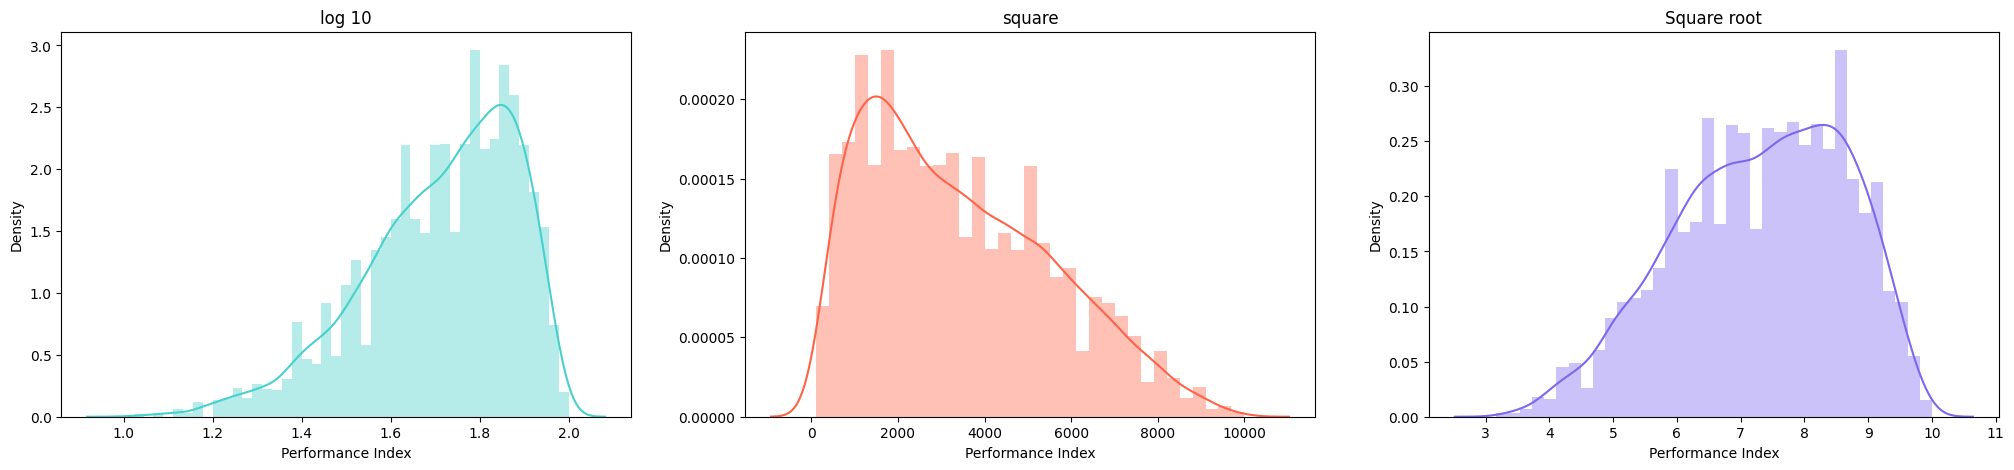

In [25]:
# Checking some tranformations on Dependent variable'Performance Index'
fig,axes = plt.subplots(1,3,figsize=(25,5))

sns.distplot(np.sqrt(df['Performance Index']),ax=axes[2], color='mediumslateblue').set_title("Square root")  #applying Square root transformation
sns.distplot(np.log10(df['Performance Index']+0.0000001),ax=axes[0],color='mediumturquoise').set_title("log 10") #applying log transformation
sns.distplot((df['Performance Index']**2),ax=axes[1],color='tomato').set_title("square") #applying Square transformation

# Splitting the data in Train and Test.
Now that the Dataset is cleaned and we have added all the neccessary features along with some conversions of categorical features. Its time to split the data into training and testing sets.

Note:- These training and testing data are going to be same for all the model we'll build such that all of the models are evaluated on a same set of parametersels.

In [26]:
#Importing train test split
from sklearn.model_selection import train_test_split

In [27]:
# Dependent Variable of the dataset
y=df['Performance Index']**2
#Independent variables of the dataset 
X=df.drop('Performance Index',axis=1)

In [28]:
# Dividing the data in training and test dataset.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [29]:
# cHecking the shape of our train and test data.

print(X_train.shape)
print(X_test.shape)

(6911, 5)
(2962, 5)


In [30]:
# Transforming data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***Now its time to implement the Machine Learning models and check the accuracy of each model to point out the best one out of all. In this project we are implementing 8 machine learning algorithms to predict the target variable.***

# Linear Regression Model
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, rather than trying to classify them into categories. There are two main types
1. Simple Linear Regression
It consist of the Line equation which is Y=mx+c
3. Multilinear Regression:y to learn.

In [31]:
#Building the model and fitting training data.
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [32]:
#Checking the predication of the train and test Data with our model to check better performance
lr_train_pred=lr_model.predict(X_train)
lr_test_pred=lr_model.predict(X_test)

In [33]:
# Importing important libraries for checking evaluation metrics.

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [34]:
# evaluation metrics for TRAIN data
r2score_lr=r2_score(y_train,lr_train_pred)
MAE_lr=mean_absolute_error(y_train,lr_train_pred)
MSE_lr=mean_squared_error(y_train,lr_train_pred)
RMSE_lr=np.sqrt(MSE_lr)

In [35]:
# Evaluation of training data set
print(f"The Mean Absolute Error (MAE) is {MAE_lr}.")
print(f"The Mean Squred Error(MSE) is {MSE_lr}.")
print(f"The R2 Score is {r2score_lr}.")
print(f'The RMSE score is: {RMSE_lr}')

The Mean Absolute Error (MAE) is 351.2431964155156.
The Mean Squred Error(MSE) is 203312.86716924622.
The R2 Score is 0.9562842789192444.
The RMSE score is: 450.902281175474


In [36]:
# storing the test set metrics value in the train evaluation dataframe.
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),2),
       'MSE':round((MSE_lr),2),
       'R2_score':round((r2score_lr),3),
       'RMSE': round((RMSE_lr),3)
       }
train_eval=pd.DataFrame(dict1,index=[1])
train_eval

,Model,MAE,MSE,R2_score,RMSE
1,Linear regression,351.24,203312.87,0.956,450.902


In [37]:
# evaluation metrics for TEST data
r2score_lr1=r2_score(y_test,lr_test_pred)
MAE_lr1=mean_absolute_error(y_test,lr_test_pred)
MSE_lr1=mean_squared_error(y_test,lr_test_pred)
RMSE_lr1=np.sqrt(MSE_lr1)

In [38]:
# Evaluation of test data set
print(f"The Mean Absolute Error (MAE) is {MAE_lr1}.")
print(f"The Mean Squred Error(MSE) is {MSE_lr1}.")
print(f"The R2 Score is {r2score_lr1}.")
print(f'The RMSE score is: {RMSE_lr1}')

The Mean Absolute Error (MAE) is 352.9310127703832.
The Mean Squred Error(MSE) is 207672.28314731963.
The R2 Score is 0.9554294813444537.
The RMSE score is: 455.71074504264175


In [39]:
# storing the test set metrics value in the test evaluation dataframe.
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr1),2),
       'MSE':round((MSE_lr1),2),
       'R2_score':round((r2score_lr1),3),
       'RMSE': round((RMSE_lr1),3)
       }
test_eval=pd.DataFrame(dict2,index=[1])
test_eval

,Model,MAE,MSE,R2_score,RMSE
1,Linear regression,352.93,207672.28,0.955,455.711


Text(0.5, 1.0, 'Actual vs Predicted')

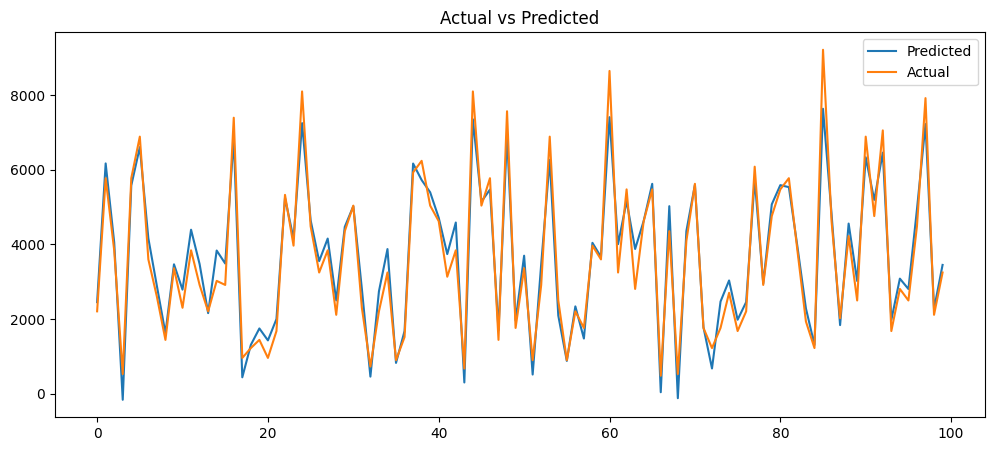

In [40]:
#Making the graph of the comparison of both actual and predicted test data
plt.figure(figsize=(12,5))
plt.plot((lr_test_pred)[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted')
           

Text(0.5, 1.0, 'Actual vs Predicted')

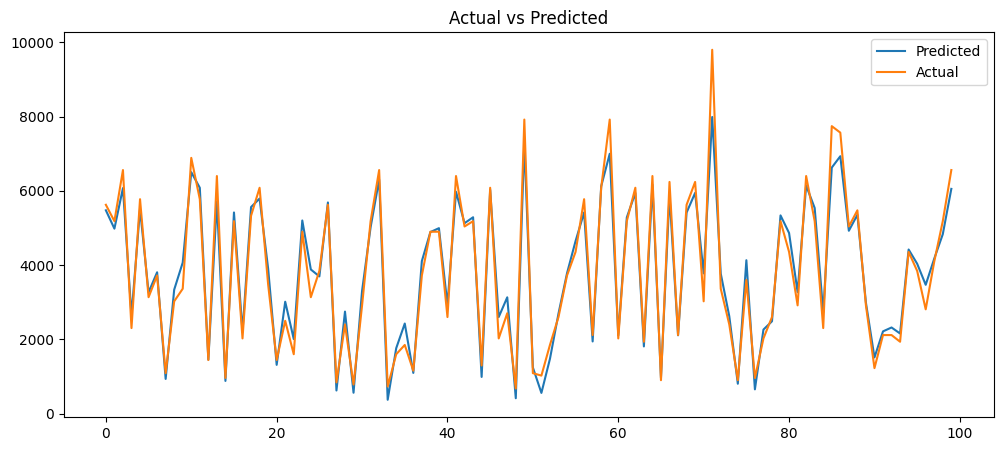

In [41]:
#Making the graph of the comparison of both actual and predicted  train data
plt.figure(figsize=(12,5))
plt.plot((lr_train_pred)[:100])
plt.plot(np.array(y_train)[:100])
plt.legend(['Predicted','Actual'])
plt.title('Actual vs Predicted')

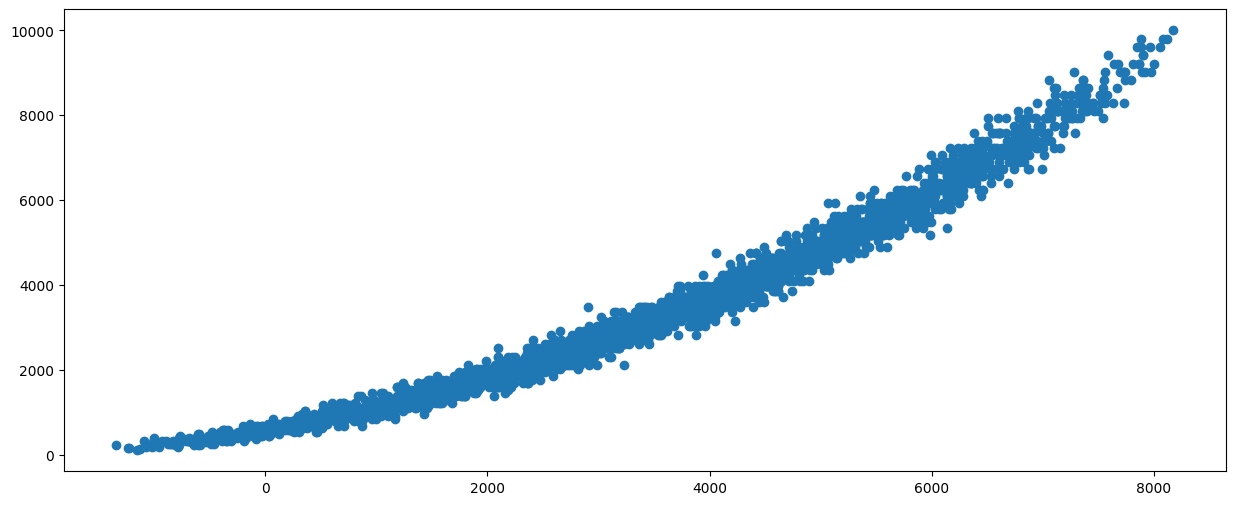

In [42]:
#Scatter chart for the data
plt.figure(figsize=(15,6))
plt.scatter(lr_test_pred,y_test)

# Ridge Regression
In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient lambda to control that penalty term. In this case if lambda is zero then the equation is the basic OLS else if lambda > 0 then it will add a constraint to the coefficient. As we increase the value of lambda this constraint causes the value of the coefficient to tend towards zero. This leads to tradeoff of higher bias (dependencies on certain coefficients tend to be 0 and on certain coefficients tend to be very large, making the model less flexible) for lower variance.

Limitation of Ridge Regression:

Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.

In [43]:
#importing the model
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)

In [44]:
#Fitting the dataset with the model
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [45]:
#Lets check the score of the Ridge regression for the training data
ridge.score(X_train,y_train)

0.9562842532627165

In [46]:
#predictions for the test data by the model
ridge_test_pred=ridge.predict(X_test)
#Prediction for the train data by the model
ridge_train_pred=ridge.predict(X_train)

In [47]:
#Evaluation of the test data by model by the matrix
r2score_ridge=r2_score(y_test,ridge_test_pred)
MSE_ridge=mean_squared_error(y_test,ridge_test_pred)
MAE_ridge=mean_absolute_error(y_test,ridge_test_pred)
RMSE_ridge=np.sqrt(MSE_ridge)

In [48]:
#Printing the result of the test data
print(f'The r2Score is: {r2score_ridge}.')
print(f'The MSE is: {MSE_ridge}.')
print(f'The MAE is: {MAE_ridge}')
print(f'The RMSE score is: {RMSE_ridge}')

The r2Score is: 0.9554268672155585.
The MSE is: 207684.46344345494.
The MAE is: 352.9279728142971
The RMSE score is: 455.72410891180084


In [49]:
dict1={'Model':'Ridge Regression ',
       'MAE':round((MAE_ridge),2),
       'MSE':round((MSE_ridge),2),
       'R2_score':round((r2score_ridge),3),
       'RMSE': round((RMSE_ridge),3)
       }
ridge_test=pd.DataFrame(dict1,index=[1])
test_eval=pd.concat([test_eval,ridge_test],ignore_index=True)
test_eval

,Model,MAE,MSE,R2_score,RMSE
0,Linear regression,352.93,207672.28,0.955,455.711
1,Ridge Regression,352.93,207684.46,0.955,455.724


In [50]:
#Evaluation of the train data by the model matrix
r2score_ridge1=r2_score(y_train,ridge_train_pred)
MSE_ridge1=mean_squared_error(y_train,ridge_train_pred)
MAE_ridge1=mean_absolute_error(y_train,ridge_train_pred)
RMSE_ridge1=np.sqrt(MSE_ridge1)

In [51]:
#Printing the result of the train data
print(f'The r2Score is: {r2score_ridge1}.')
print(f'The MSE is: {MSE_ridge1}.')
print(f'The MAE is: {MAE_ridge1}')
print(f'The RMSE score is: {RMSE_ridge1}')

The r2Score is: 0.9562842532627165.
The MSE is: 203312.98649250416.
The MAE is: 351.23392995268864
The RMSE score is: 450.9024134915494


In [52]:
dict2={'Model':'Ridge Regression ',
       'MAE':round((MAE_ridge1),2),
       'MSE':round((MSE_ridge1),2),
       'R2_score':round((r2score_ridge1),3),
       'RMSE': round((RMSE_ridge1),3)
       }
ridge_train=pd.DataFrame(dict2,index=[1])
train_eval=pd.concat([train_eval,ridge_train],ignore_index=True)
train_eval

,Model,MAE,MSE,R2_score,RMSE
0,Linear regression,351.24,203312.87,0.956,450.902
1,Ridge Regression,351.23,203312.99,0.956,450.902


Text(0.5, 1.0, 'Test Data (Predicted vs Actual)')

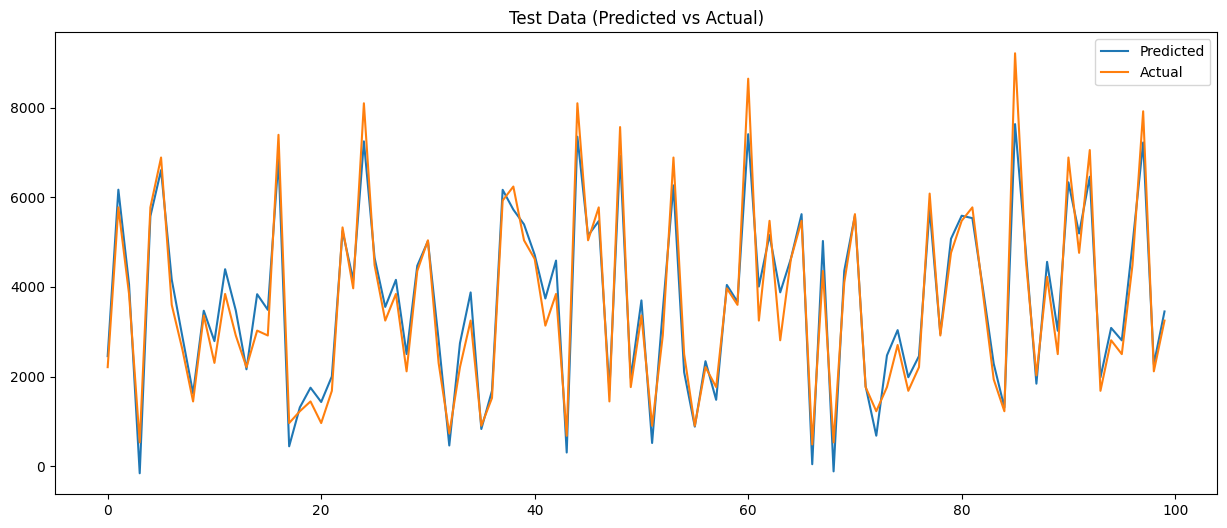

In [53]:
#Ploting the Graph of prediction and actual in test data
plt.figure(figsize=(15,6))
plt.plot((ridge_test_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Test Data (Predicted vs Actual)')

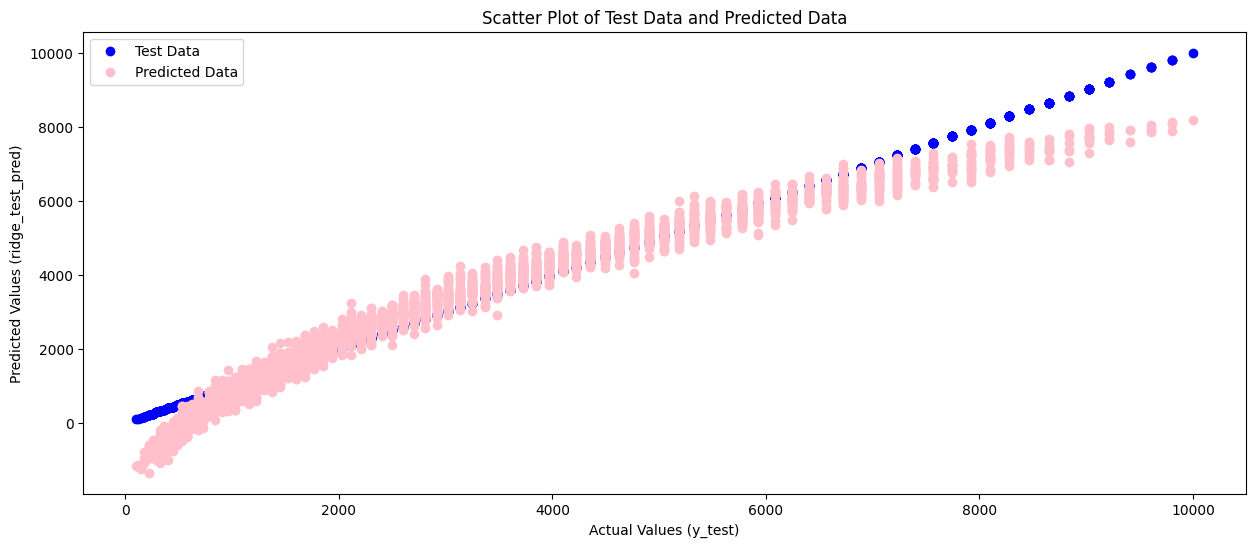

In [54]:
#Scatter plot of the test data
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_test, color='blue', label='Test Data')
plt.scatter(y_test, ridge_test_pred, color='pink', label='Predicted Data')
plt.legend()
plt.title('Scatter Plot of Test Data and Predicted Data')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (ridge_test_pred)')
plt.show()


Text(0.5, 1.0, 'Train data (Predicted VS Actual)')

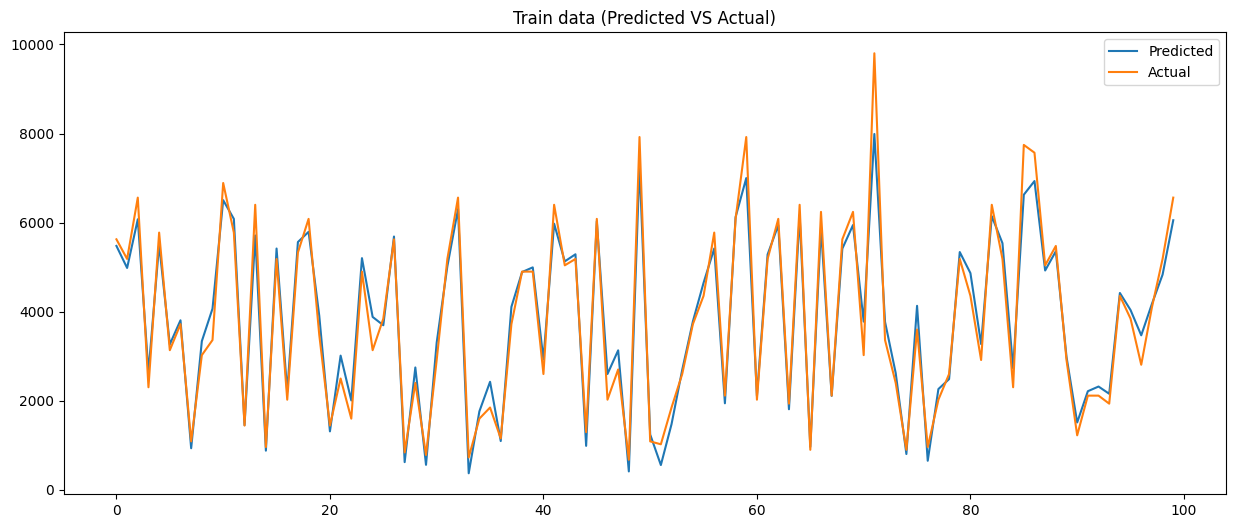

In [55]:
#plotting for the train data
plt.figure(figsize=(15,6))
plt.plot((ridge_train_pred)[:100])
plt.plot((np.array(y_train)[:100]))
plt.legend(['Predicted','Actual'])
plt.title('Train data (Predicted VS Actual)')

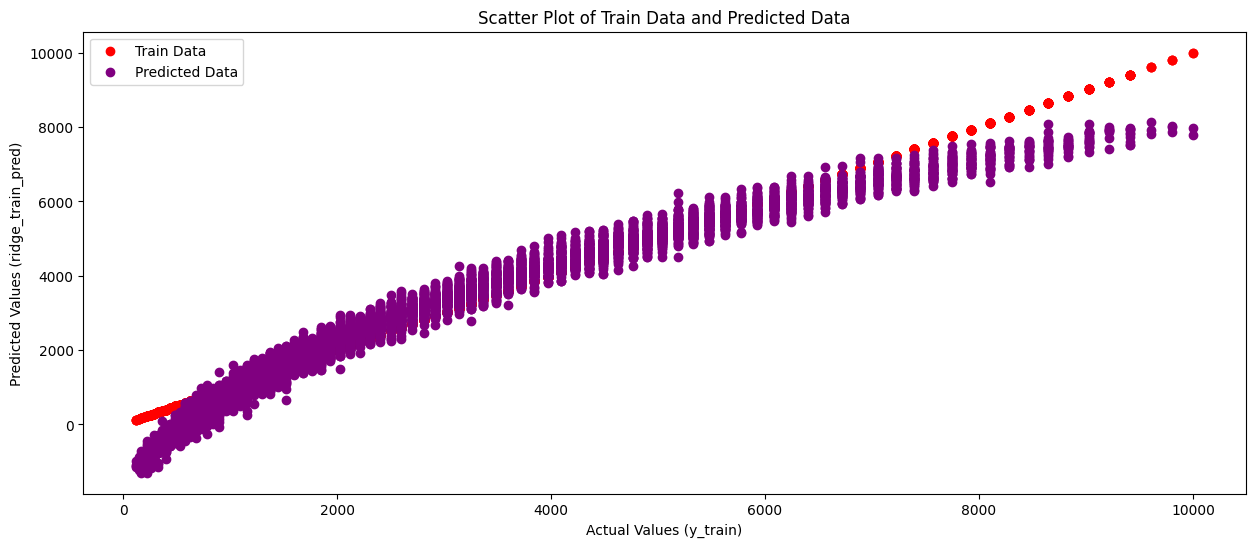

In [56]:
#Scatter plot of the train data
plt.figure(figsize=(15, 6))
plt.scatter(y_train, y_train, color='red', label='Train Data')
plt.scatter(y_train, ridge_train_pred, color='purple', label='Predicted Data')
plt.legend()
plt.title('Scatter Plot of Train Data and Predicted Data')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (ridge_train_pred)')
plt.show()

# Lasso Machine Learning Algorithm
Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.

Limitation of Lasso Regression:

Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set). If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data.

In [57]:
#importing the model
from sklearn.linear_model import Lasso
lass=Lasso(alpha=0.1, max_iter=3000)

In [58]:
#fitting the Training Data on the model
lass.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [59]:
#Predication for the test data
lass_test_pred=lass.predict(X_test)
#Prediction for the Train data
lass_train_pred=lass.predict(X_train)

In [60]:
#Evaluating the Model for the test data
r2score_lass=r2_score(y_test,lass_test_pred)
MSE_lass=mean_squared_error(y_test,lass_test_pred)
MAE_lass=mean_absolute_error(y_test,lass_test_pred)
RMSE_lass=np.sqrt(MSE_lass)

In [61]:
#Printing the score of the test data
print(f'R2 Score is: {r2score_lass}.')
print(f'MSE is: {MSE_lass}.')
print(f'MAE is: {MAE_lass}.')
print(f'The RMSE score is: {RMSE_lass}')

R2 Score is: 0.9554238600040287.
MSE is: 207698.47527241983.
MAE is: 352.9363683172422.
The RMSE score is: 455.7394818011929


In [62]:
# Putting them in a dataframe for better understanding
dict1={'Model':'Lasso Regression ',
       'MAE':round((MAE_lass),2),
       'MSE':round((MSE_lass),2),
       'R2_score':round((r2score_lass),3),
       'RMSE': round((RMSE_lass),3)
       }
lass_test=pd.DataFrame(dict1,index=[1])
test_eval=pd.concat([test_eval,lass_test],ignore_index=True)
test_eval

,Model,MAE,MSE,R2_score,RMSE
0,Linear regression,352.93,207672.28,0.955,455.711
1,Ridge Regression,352.93,207684.46,0.955,455.724
2,Lasso Regression,352.94,207698.48,0.955,455.739


In [63]:
#Evaluating the Model for the train data
r2score_lass1=r2_score(y_train,lass_train_pred)
MSE_lass1=mean_squared_error(y_train,lass_train_pred)
MAE_lass1=mean_absolute_error(y_train,lass_train_pred)
RMSE_lass1=np.sqrt(MSE_lass1)

In [64]:
#Printing the score of the train data
print(f'R2 Score is: {r2score_lass1}.')
print(f'MSE is: {MSE_lass1}.')
print(f'MAE is: {MAE_lass1}.')
print(f'The RMSE score is: {RMSE_lass1}')

R2 Score is: 0.9562841860701207.
MSE is: 203313.2989915082.
MAE is: 351.2297846877972.
The RMSE score is: 450.9027600176209


In [65]:
# Putting them in a dataframe for better understanding
dict2={'Model':'Lasso Regression ',
       'MAE':round((MAE_lass1),2),
       'MSE':round((MSE_lass1),2),
       'R2_score':round((r2score_lass1),3),
       'RMSE': round((RMSE_lass1),3)
       }
lass_train=pd.DataFrame(dict2,index=[1])
train_eval=pd.concat([train_eval,lass_train],ignore_index=True)
train_eval

,Model,MAE,MSE,R2_score,RMSE
0,Linear regression,351.24,203312.87,0.956,450.902
1,Ridge Regression,351.23,203312.99,0.956,450.902
2,Lasso Regression,351.23,203313.30,0.956,450.903


Text(0.5, 1.0, 'Test Data (Predicted vs Actual)')

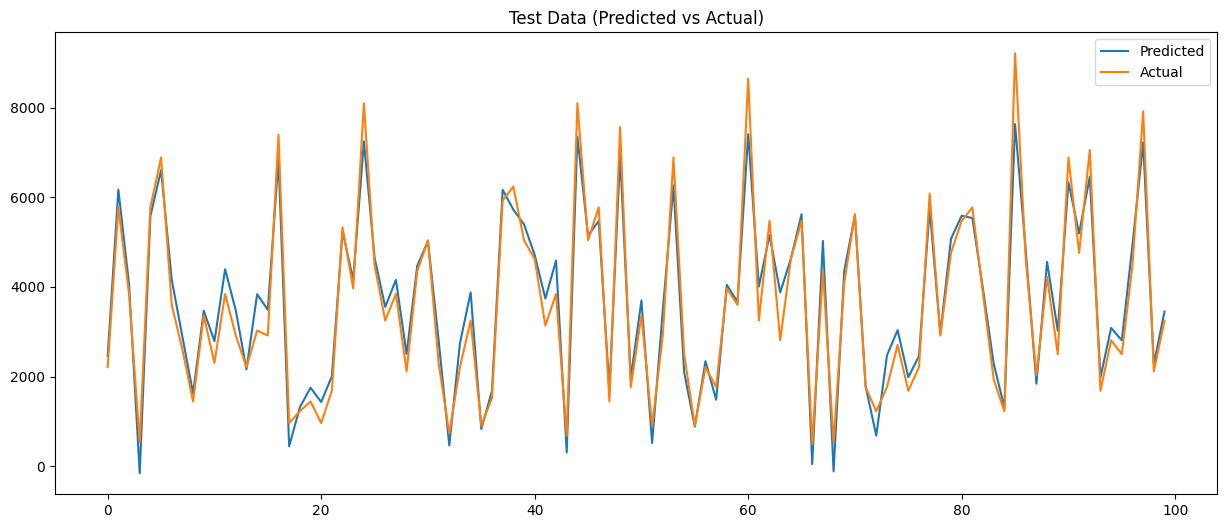

In [66]:
# Plotting the Predicted data and actual data of Test
plt.figure(figsize=(15,6))
plt.plot((lass_test_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Test Data (Predicted vs Actual)')

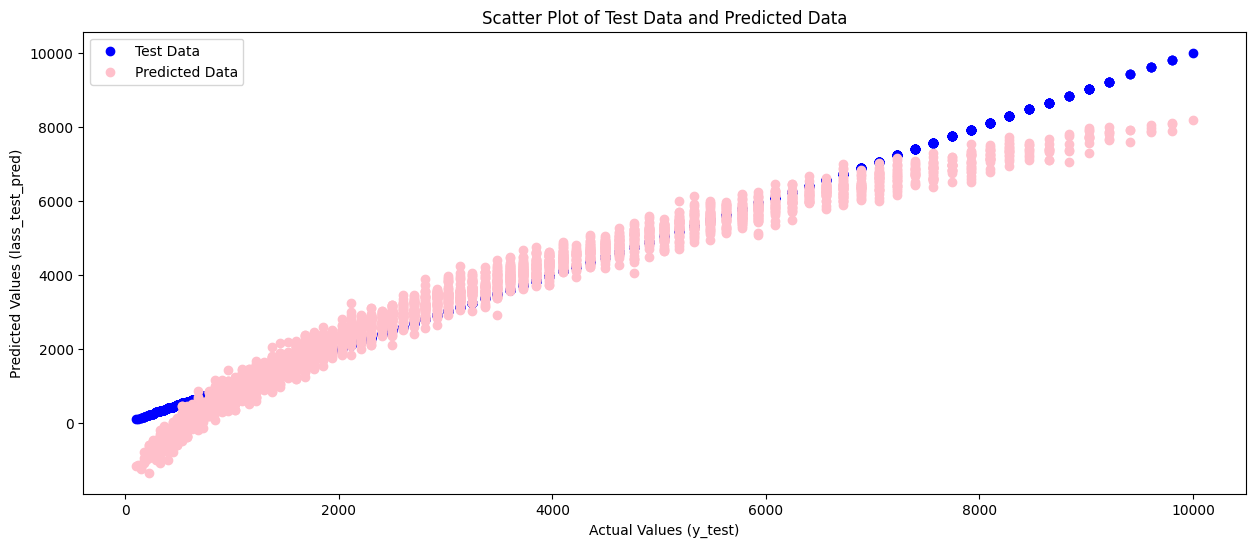

In [67]:
#Scatter plot of the test data
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_test, color='blue', label='Test Data')
plt.scatter(y_test, lass_test_pred, color='pink', label='Predicted Data')
plt.legend()
plt.title('Scatter Plot of Test Data and Predicted Data')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (lass_test_pred)')
plt.show()

Text(0.5, 1.0, 'Train data (Predicted VS Actual)')

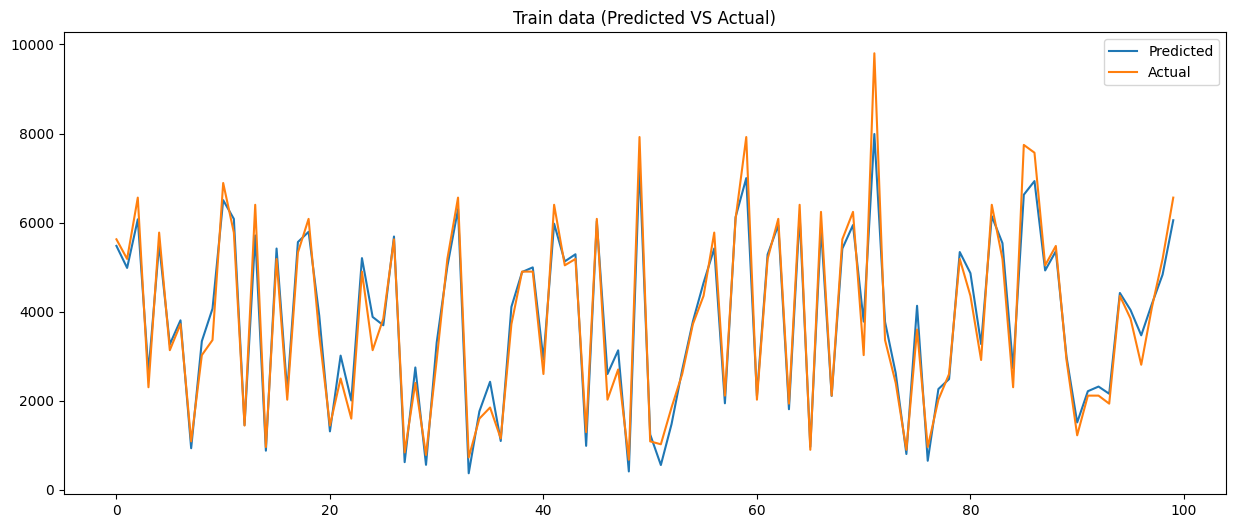

In [68]:
#plotting for the train data
plt.figure(figsize=(15,6))
plt.plot((lass_train_pred)[:100])
plt.plot((np.array(y_train)[:100]))
plt.legend(['Predicted','Actual'])
plt.title('Train data (Predicted VS Actual)')

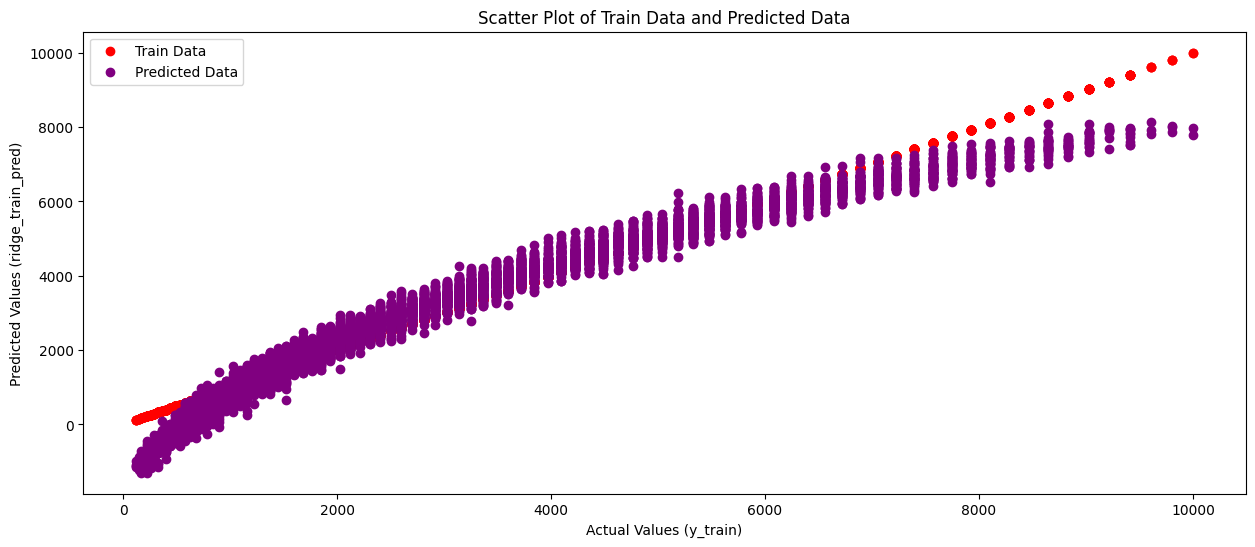

In [69]:
#Scatter plot of the train data
plt.figure(figsize=(15, 6))
plt.scatter(y_train, y_train, color='red', label='Train Data')
plt.scatter(y_train, lass_train_pred, color='purple', label='Predicted Data')
plt.legend()
plt.title('Scatter Plot of Train Data and Predicted Data')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (ridge_train_pred)')
plt.show()

# Optimization
Here, we have used Optimization technique in our Decision Tree, Random forest, Xgboost regressor, and gradient boost regressor to improve the accuracy.

But before diving into that we need to understand what hyperparameters are.

Hyperparameters are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Random Forest Algorithms.

Now we know what hyperparameters are, our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. To achieve that we'll use Grid Search CV that will help us find best hyperparameters values for our models.

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

# Decision Tree
Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In a Decision Tree diagram, we have:

Root Node: The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.

Splitting: It is a process of dividing a node into two or more sub-nodes.

Decision Node: This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.

Leaf: Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.

In [70]:
#Importing the Decision Tree regression model and GridSearch CV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [71]:
model=DecisionTreeRegressor()

In [72]:
# list of parameters

max_depth = [8,10,12]
min_sample_split = [150,200,250]
min_sample_leaf = [50,100,150]
# Hyperparameter Grid

grid = {'max_depth' : max_depth,
         'min_samples_split' : min_sample_split,
         'min_samples_leaf' : min_sample_leaf}

In [73]:
dt_model = GridSearchCV(model, grid, scoring='r2', cv=5)
dt_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [150, 200, 250]},
             scoring='r2')

In [74]:
dt_train_pred=dt_model.predict(X_train)
dt_test_pred=dt_model.predict(X_test)

In [75]:
#Evaluation of the performance matrix for the train Data
MSE_dt= mean_squared_error(y_train,dt_train_pred)
MAE_dt= mean_absolute_error(y_train,dt_train_pred)
r2score_dt=r2_score(y_train,dt_train_pred)
RMSE_dt=np.sqrt(MSE_dt)

In [76]:
# Evaluation of train data set
print(f"The Mean Absolute Error (MAE) is {MAE_dt}.")
print(f"The Mean Squred Error(MSE) is {MSE_dt}.")
print(f"The R2 Score is {r2score_dt}.")
print(f'The RMSE score is: {RMSE_dt}')

The Mean Absolute Error (MAE) is 253.70625811000522.
The Mean Squred Error(MSE) is 112150.98099737777.
The R2 Score is 0.9758856334452594.
The RMSE score is: 334.88950565429457


In [77]:
# storing the test set metrics value in the train evaluation dataframe.
dict1={'Model':'Decision Tree',
       'MAE':round((MAE_dt),2),
       'MSE':round((MSE_dt),2),
       'R2_score':round((r2score_dt),3),
       'RMSE': round((RMSE_dt),3)
       }
dttrain_eval=pd.DataFrame(dict1,index=[1])
train_eval=pd.concat([train_eval,dttrain_eval],ignore_index=True)
train_eval

,Model,MAE,MSE,R2_score,RMSE
0,Linear regression,351.24,203312.87,0.956,450.902
1,Ridge Regression,351.23,203312.99,0.956,450.902
2,Lasso Regression,351.23,203313.30,0.956,450.903
3,Decision Tree,253.71,112150.98,0.976,334.890


In [78]:
#Evaluation of the performance matrix for the test Data
MSE_dt1= mean_squared_error(y_test,dt_test_pred)
MAE_dt1= mean_absolute_error(y_test,dt_test_pred)
r2score_dt1=r2_score(y_test,dt_test_pred)
RMSE_dt1=np.sqrt(MSE_dt1)

In [79]:
# Evaluation of train data set
print(f"The Mean Absolute Error (MAE) is {MAE_dt1}.")
print(f"The Mean Squred Error(MSE) is {MSE_dt1}.")
print(f"The R2 Score is {r2score_dt1}.")
print(f'The RMSE score is: {RMSE_dt1}')

The Mean Absolute Error (MAE) is 270.9803564482756.
The Mean Squred Error(MSE) is 127804.5904265351.
The R2 Score is 0.9725706445003571.
The RMSE score is: 357.497678910696


In [80]:
# storing the test set metrics value in the test evaluation dataframe.
dict2={'Model':'Decision Tree',
       'MAE':round((MAE_dt1),2),
       'MSE':round((MSE_dt1),2),
       'R2_score':round((r2score_dt1),3),
       'RMSE': round((RMSE_dt1),3)
       }
dttest_eval=pd.DataFrame(dict2,index=[1])
test_eval=pd.concat([test_eval,dttest_eval],ignore_index=True)
test_eval

,Model,MAE,MSE,R2_score,RMSE
0,Linear regression,352.93,207672.28,0.955,455.711
1,Ridge Regression,352.93,207684.46,0.955,455.724
2,Lasso Regression,352.94,207698.48,0.955,455.739
3,Decision Tree,270.98,127804.59,0.973,357.498


Text(0.5, 1.0, 'Train Data (Predicted VS Actual)')

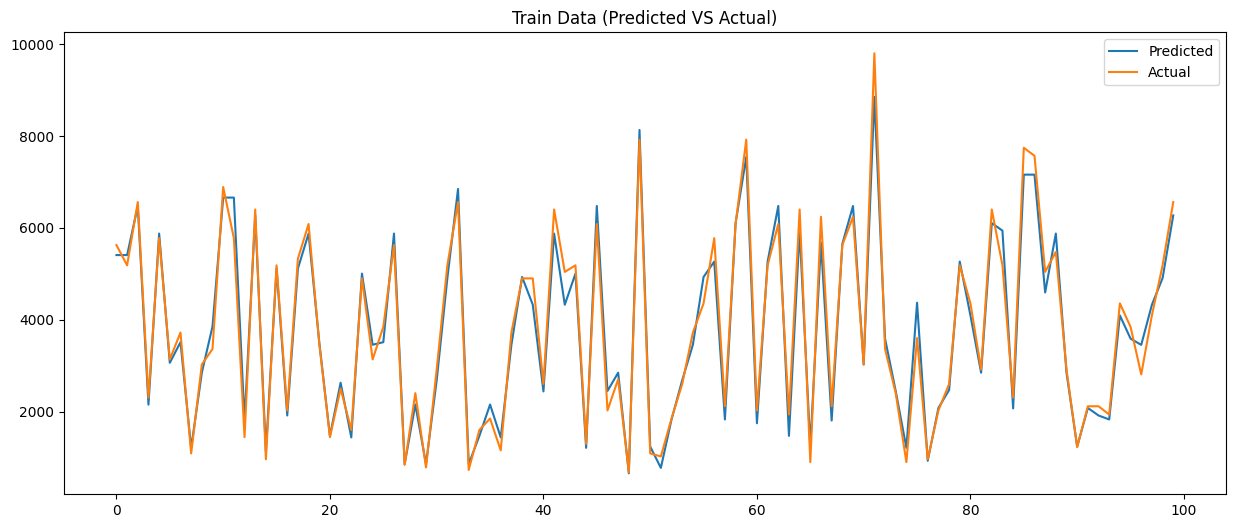

In [81]:
#Graph for the representation of the train data with predicted data
plt.figure(figsize=(15,6))
plt.plot((dt_train_pred)[:100])
plt.plot((np.array(y_train)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Train Data (Predicted VS Actual)')

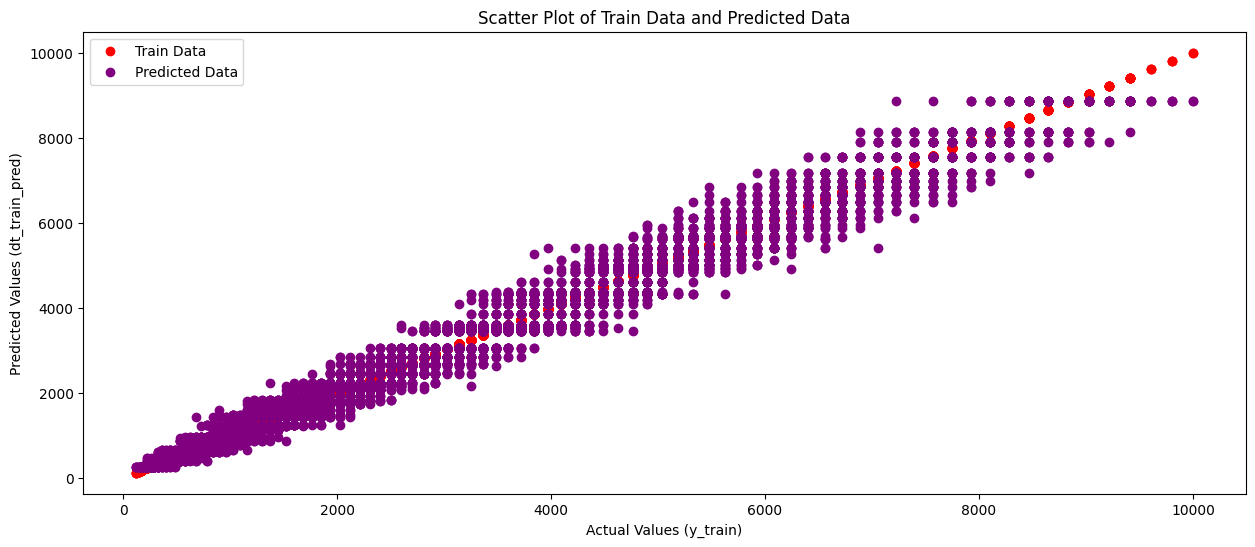

In [82]:
#Scatter plot of the train data
plt.figure(figsize=(15, 6))
plt.scatter(y_train, y_train, color='red', label='Train Data')
plt.scatter(y_train, dt_train_pred, color='purple', label='Predicted Data')
plt.legend()
plt.title('Scatter Plot of Train Data and Predicted Data')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (dt_train_pred)')
plt.show()

Text(0.5, 1.0, 'Test Data (Predicted VS Actual)')

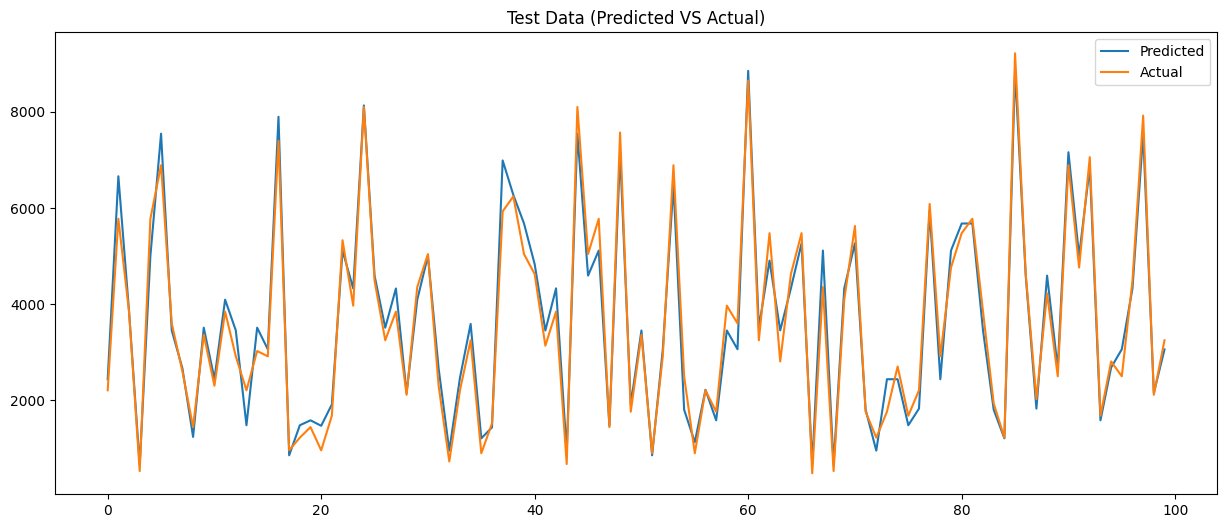

In [83]:
#Graphical Representation of Test Data
plt.figure(figsize=(15,6))
plt.plot((dt_test_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(['Predicted','Actual'])
plt.title('Test Data (Predicted VS Actual)')

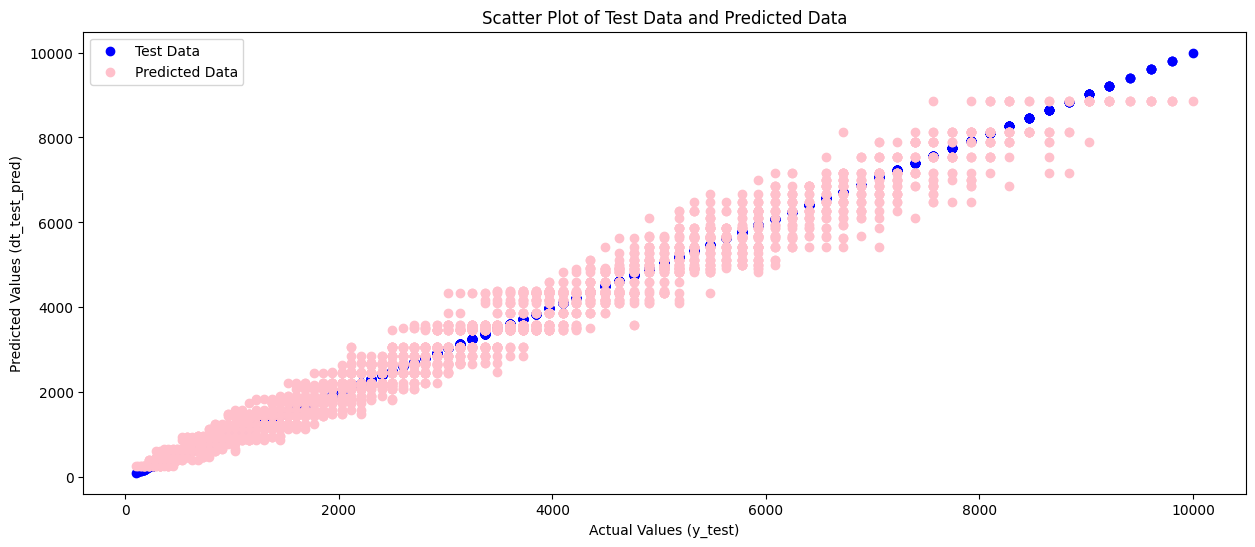

In [84]:
#Scatter plot of the test data
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_test, color='blue', label='Test Data')
plt.scatter(y_test, dt_test_pred, color='pink', label='Predicted Data')
plt.legend()
plt.title('Scatter Plot of Test Data and Predicted Data')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (dt_test_pred)')
plt.show()

# Random Forest Regression
Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [85]:
#Importing the Model from the library
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(max_depth=11, max_features='log2', n_estimators=500)

In [86]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, max_features='log2', n_estimators=500)

In [87]:
rf_test_pred=rf_model.predict(X_test)
rf_train_pred=rf_model.predict(X_train)

In [88]:
#Evaluation of the performance matrix for the train Data
MSE_rf= mean_squared_error(y_train,rf_train_pred)
MAE_rf= mean_absolute_error(y_train,rf_train_pred)
r2score_rf=r2_score(y_train,rf_train_pred)
RMSE_rf=np.sqrt(MSE_rf)

In [89]:
# Evaluation of train data set
print(f"The Mean Absolute Error (MAE) is {MAE_rf}.")
print(f"The Mean Squred Error(MSE) is {MSE_rf}.")
print(f"The R2 Score is {r2score_rf}.")
print(f'The RMSE score is: {RMSE_rf}')

The Mean Absolute Error (MAE) is 135.05794939782712.
The Mean Squred Error(MSE) is 31326.271409902318.
The R2 Score is 0.9932643193590136.
The RMSE score is: 176.9922919505319


In [90]:
dict1={'Model':'Random Forest Regression',
       'MAE':round((MAE_rf),2),
       'MSE':round((MSE_rf),2),
       'R2_score':round((r2score_rf),3),
       'RMSE': round((RMSE_rf),3)
       }
rftrain_eval=pd.DataFrame(dict1,index=[1])
train_eval=pd.concat([train_eval,rftrain_eval],ignore_index=True)
train_eval

,Model,MAE,MSE,R2_score,RMSE
0,Linear regression,351.24,203312.87,0.956,450.902
1,Ridge Regression,351.23,203312.99,0.956,450.902
2,Lasso Regression,351.23,203313.30,0.956,450.903
3,Decision Tree,253.71,112150.98,0.976,334.890
4,Random Forest Regression,135.06,31326.27,0.993,176.992


In [91]:
#Evaluation of the performance matrix for the test Data
MSE_rf1= mean_squared_error(y_test,rf_test_pred)
MAE_rf1= mean_absolute_error(y_test,rf_test_pred)
r2score_rf1=r2_score(y_test,rf_test_pred)
RMSE_rf1=np.sqrt(MSE_rf1)

In [92]:
# Evaluation of test data set
print(f"The Mean Absolute Error (MAE) is {MAE_rf1}.")
print(f"The Mean Squred Error(MSE) is {MSE_rf1}.")
print(f"The R2 Score is {r2score_rf1}.")
print(f'The RMSE score is: {RMSE_rf1}.')

The Mean Absolute Error (MAE) is 208.95441957873757.
The Mean Squred Error(MSE) is 77087.7468402126.
The R2 Score is 0.9834554673999593.
The RMSE score is: 277.646802323046.


In [93]:
# storing the test set metrics value in the test evaluation dataframe.
dict1={'Model':'Random Forest Regression',
       'MAE':round((MAE_rf),2),
       'MSE':round((MSE_rf),2),
       'R2_score':round((r2score_rf),3),
       'RMSE': round((RMSE_rf1),3)
       }
rftest_eval=pd.DataFrame(dict1,index=[1])
test_eval=pd.concat([test_eval,rftest_eval],ignore_index=True)
test_eval


,Model,MAE,MSE,R2_score,RMSE
0,Linear regression,352.93,207672.28,0.955,455.711
1,Ridge Regression,352.93,207684.46,0.955,455.724
2,Lasso Regression,352.94,207698.48,0.955,455.739
3,Decision Tree,270.98,127804.59,0.973,357.498
4,Random Forest Regression,135.06,31326.27,0.993,277.647


Text(0.5, 1.0, 'Train Data (Predicted VS Actual)')

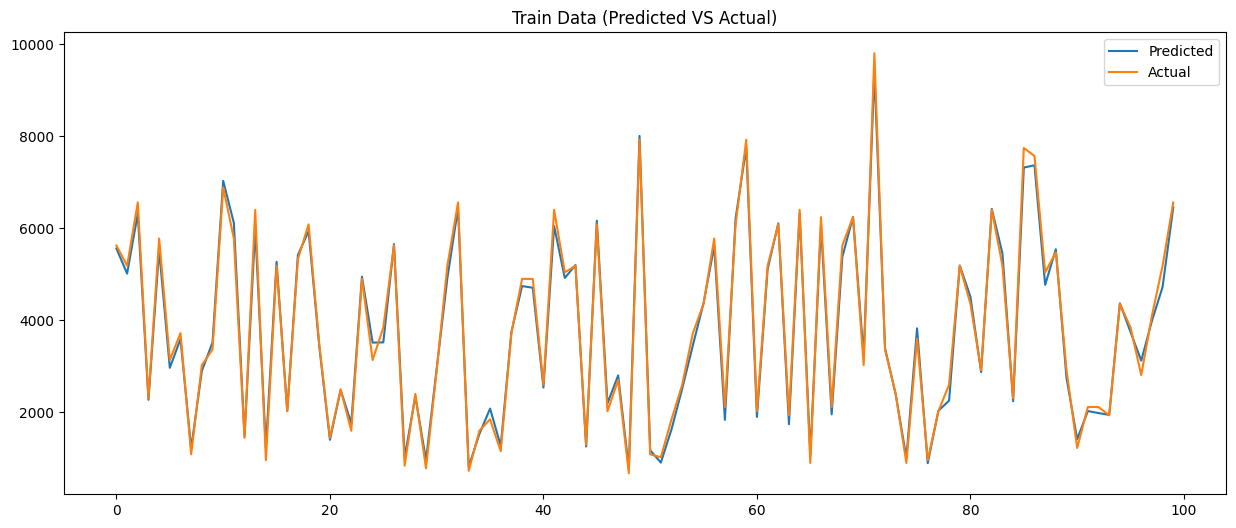

In [94]:
#Graph for the representation of the train data with predicted data
plt.figure(figsize=(15,6))
plt.plot((rf_train_pred)[:100])
plt.plot((np.array(y_train)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Train Data (Predicted VS Actual)')


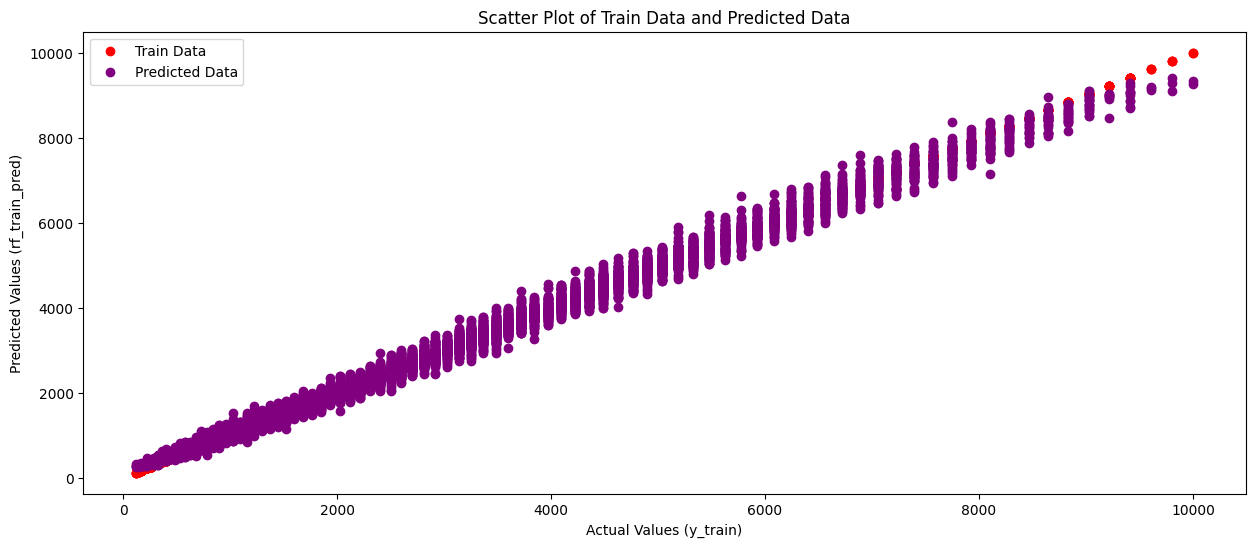

In [95]:
#Scatter plot of the train data
plt.figure(figsize=(15, 6))
plt.scatter(y_train, y_train, color='red', label='Train Data')
plt.scatter(y_train, rf_train_pred, color='purple', label='Predicted Data')
plt.legend()
plt.title('Scatter Plot of Train Data and Predicted Data')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (rf_train_pred)')
plt.show()


Text(0.5, 1.0, 'Test Data (Predicted VS Actual)')

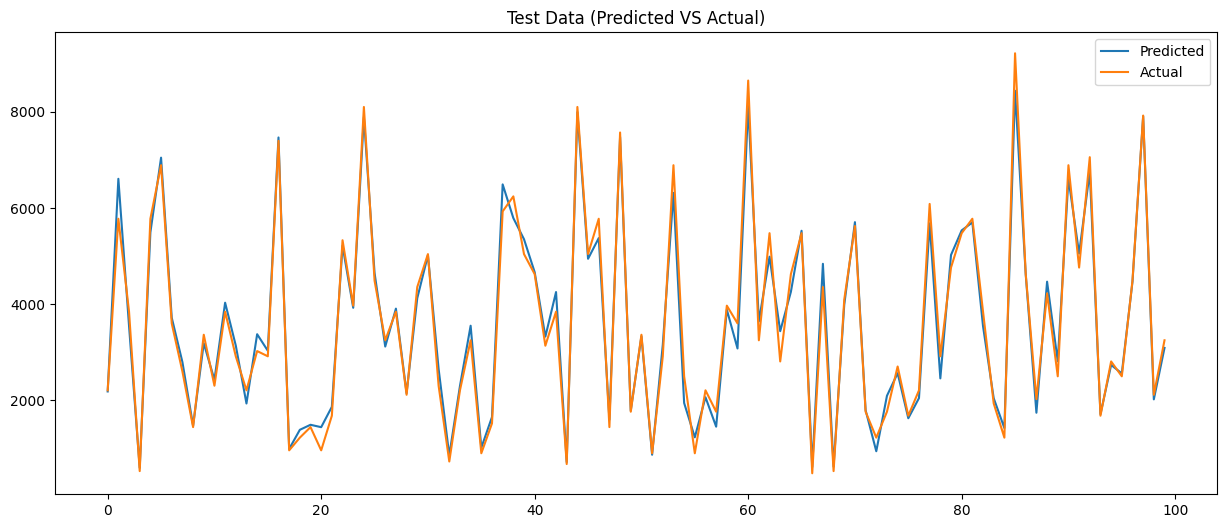

In [96]:
#Graphical Representation of Test Data
plt.figure(figsize=(15,6))
plt.plot((rf_test_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(['Predicted','Actual'])
plt.title('Test Data (Predicted VS Actual)')


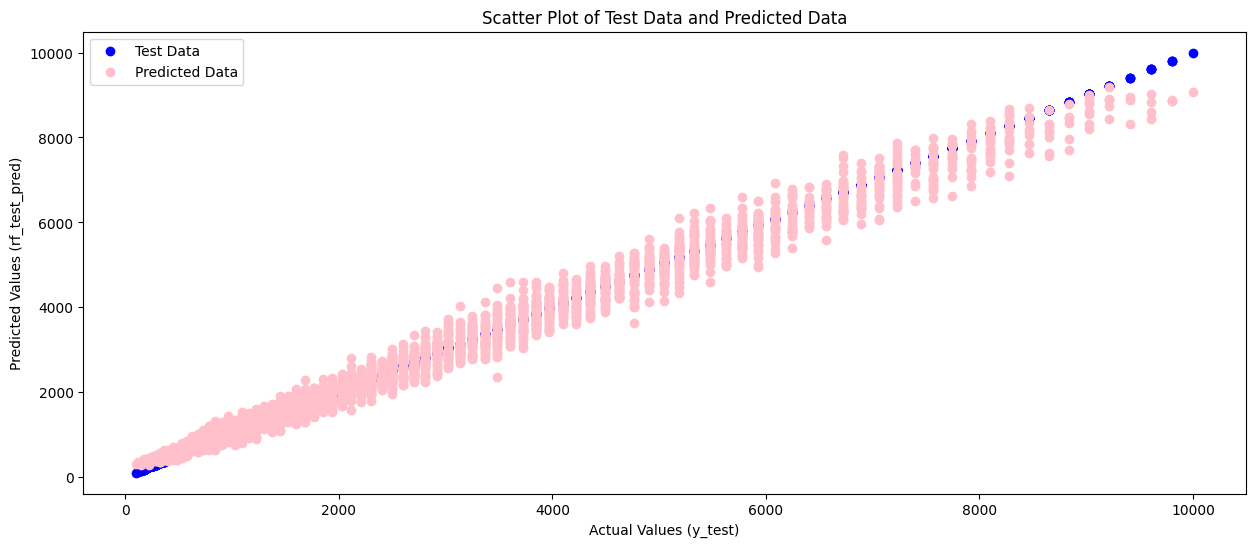

In [97]:
#Scatter plot of the test data
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_test, color='blue', label='Test Data')
plt.scatter(y_test, rf_test_pred, color='pink', label='Predicted Data')
plt.legend()
plt.title('Scatter Plot of Test Data and Predicted Data')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (rf_test_pred)')
plt.show()


In [131]:
#Checking the important features.
rf_model.feature_importances_

array([0.14611793, 0.83484747, 0.00231812, 0.00747699, 0.00923949])

Text(0.5, 1.0, 'Feature Importance')

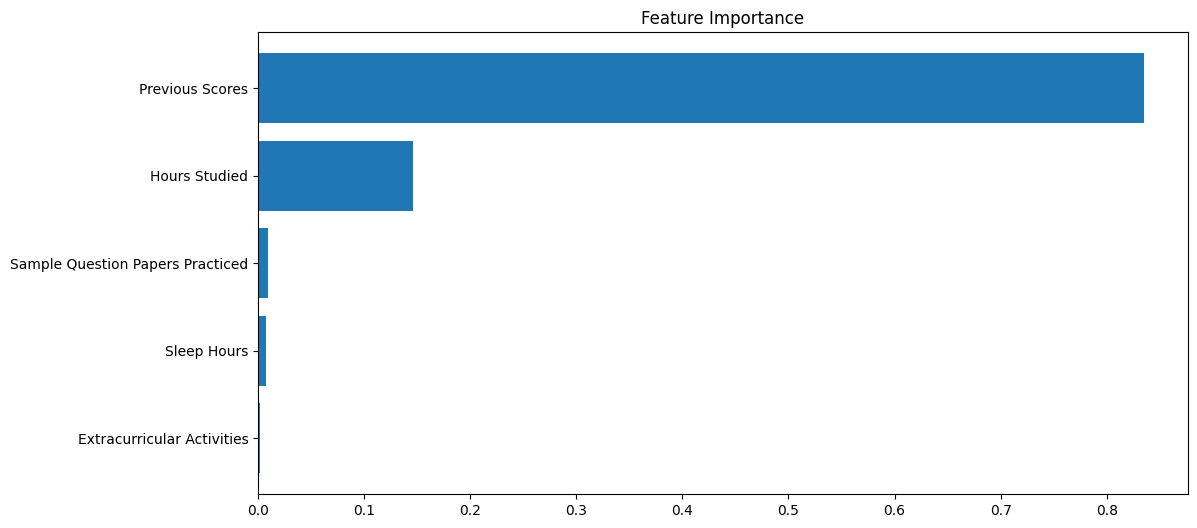

In [130]:
#Plotting the important features in a horizontal bar graph.
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')

# XGBoost Regressor
XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

In [98]:
# Importing the regressor
from xgboost import XGBRegressor
# Fitting xgb
model = XGBRegressor()

In [99]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

In [100]:
xg=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xg.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [102]:
# Analysing the best set of parameters
xg.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 1000}

In [104]:
# predict on train data.
xg_train_pred = xg.predict(X_train)

# predict on test data.
xg_test_pred = xg.predict(X_test)

In [106]:
# Evaluation metrics for TRAIN data
MSE_xg= mean_squared_error(y_train, xg_train_pred)
MAE_xg= mean_absolute_error(y_train, xg_train_pred)
RMSE_xg=np.sqrt(MSE_xg)
r2score_xg= r2_score(y_train, xg_train_pred)

In [108]:
print(f"The Mean Absolute Error (MAE) is {MAE_xg}.")
print(f"The Mean Squred Error(MSE) is {MSE_xg}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_xg}.")
print(f"The R2 Score is {r2score_xg}.")

The Mean Absolute Error (MAE) is 175.10266387833474.
The Mean Squred Error(MSE) is 53952.893914559994.
The Root Mean Squared Error(RMSE) is 232.2776225006619.
The R2 Score is 0.9883992110548266.


In [110]:
dict1={'Model':'XG Boost Regression',
       'MAE':round((MAE_xg),2),
       'MSE':round((MSE_xg),2),
       'R2_score':round((r2score_xg),3),
       'RMSE': round((RMSE_xg),3)
       }
rftrain_eval=pd.DataFrame(dict1,index=[1])
train_eval=pd.concat([train_eval,rftrain_eval],ignore_index=True)
train_eval

,Model,MAE,MSE,R2_score,RMSE
0,Linear regression,351.24,203312.87,0.956,450.902
1,Ridge Regression,351.23,203312.99,0.956,450.902
2,Lasso Regression,351.23,203313.30,0.956,450.903
3,Decision Tree,253.71,112150.98,0.976,334.890
4,Random Forest Regression,135.06,31326.27,0.993,176.992
5,Random Forest Regression,175.10,53952.89,0.988,232.278
6,XG Boost Regression,175.10,53952.89,0.988,232.278


In [111]:
# Evaluation metrics for Test data
MSE_xg1= mean_squared_error(y_test, xg_test_pred)
MAE_xg1= mean_absolute_error(y_test, xg_test_pred)
RMSE_xg1=np.sqrt(MSE_xg1)
r2score_xg1= r2_score(y_test, xg_test_pred)

In [112]:
print(f"The Mean Absolute Error (MAE) is {MAE_xg1}.")
print(f"The Mean Squred Error(MSE) is {MSE_xg1}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_xg1}.")
print(f"The R2 Score is {r2score_xg1}.")

The Mean Absolute Error (MAE) is 187.00934448345217.
The Mean Squred Error(MSE) is 62414.4724712236.
The Root Mean Squared Error(RMSE) is 249.82888638270714.
The R2 Score is 0.9866046380022636.


In [113]:
# storing the test set metrics value in the test evaluation dataframe.
dict1={'Model':'XG Boost Regressor',
       'MAE':round((MAE_xg1),2),
       'MSE':round((MSE_xg1),2),
       'R2_score':round((r2score_xg1),3),
       'RMSE': round((RMSE_xg1),3)
       }
xgtest_eval=pd.DataFrame(dict1,index=[1])
test_eval=pd.concat([test_eval,xgtest_eval],ignore_index=True)
test_eval

,Model,MAE,MSE,R2_score,RMSE
0,Linear regression,352.93,207672.28,0.955,455.711
1,Ridge Regression,352.93,207684.46,0.955,455.724
2,Lasso Regression,352.94,207698.48,0.955,455.739
3,Decision Tree,270.98,127804.59,0.973,357.498
4,Random Forest Regression,135.06,31326.27,0.993,277.647
5,XG Boost Regressor,187.01,62414.47,0.987,249.829


In [118]:
xgb_model=xg.best_estimator_
#Checking the important features.
xgb_model.feature_importances_

array([0.19651315, 0.7918884 , 0.0021318 , 0.00631369, 0.00315294],
      dtype=float32)

Text(0.5, 1.0, 'Feature Importance')

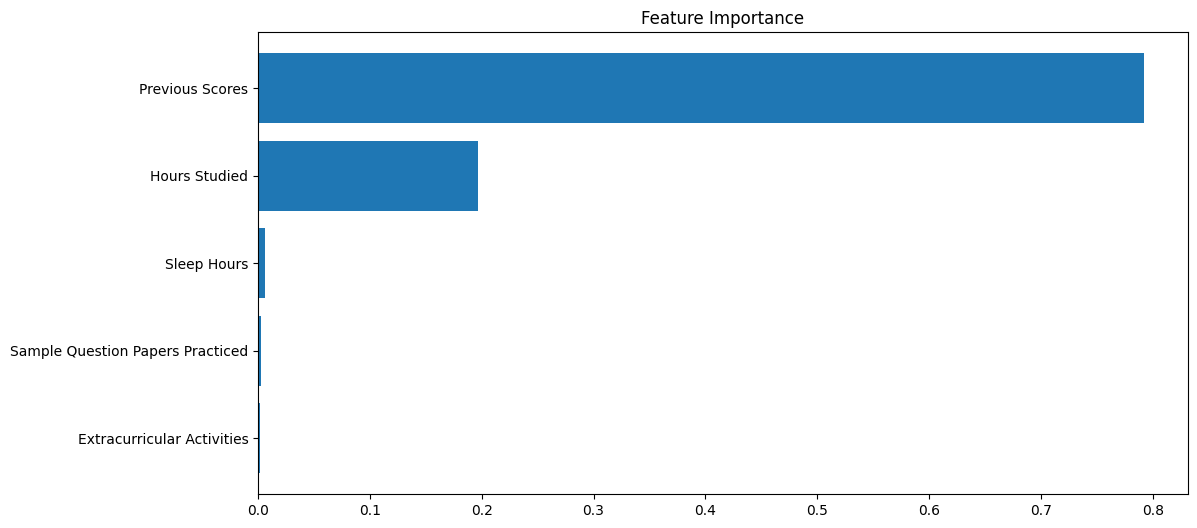

In [128]:
#Plotting the important features in a horizontal bar graph.
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')

# Challenges
1. Big data
2. Needs to plot lot of Graphs to analyse.
3. Carefully handled Feature selection part as it affects the R2 score.
4. Carefully tuned Hyperparameters as it affects the R2 score.
5. Handled the positive skewness of the target variable.
6. Handled the high correlation between various features.
7. Need to convert categorical features into numerical features using feature engineering.
# Conclusions
***The Value of RMSE of the Test Data should as low as possible to perform the model better***
1. Linear regression:- **455.711**
2. Ridge Regression:- **455.724**
3. Lasso Regression:- **455.73**
4. Decision Tree:-    **357.498**
5. Random Forest Regression:- **277.647**
6. XG Boost Regressor:-  **249.829**
7. **Random Forest Regression** and **XG Boost Regressor** gives the highest R2 Score which is 99% and 98% with the test data repectively and 98% with the train dataset which is very good and generalised model without getting any overfit.
1. The Most important feature of the dataset is the previous year score which is very important for the model and also followed by the study hours for a better prediction of the performance Index of the student.
2. Hence for the prediction of the performance Index of the Student **Random Forest Regression** and **XG Boost Regressor** can be used.